/Users/furkan/miniconda3/envs/AI/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


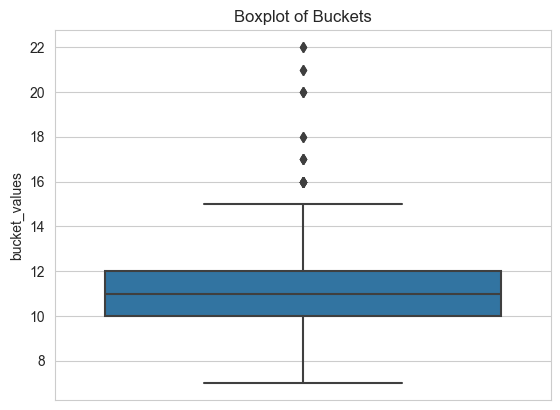

Estimated Count: 1024549
Actual Count: 1000000
Error: 2.4549000000000003%


In [4]:
import hashlib
import random
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class HyperLogLog:
    def __init__(self, b=10):
        self.m = 2**b
        self.buckets = [0] * self.m
        self.b = b

    def _hash(self, value):
        return int(hashlib.sha256(value.encode('utf-8')).hexdigest(), 16)

    def _get_bucket(self, hash_value):
        return hash_value & (self.m - 1)

    def _rho(self, hash_value):
        hash_value >>= self.b
        rho = 1
        while hash_value & 1 == 0 and rho <= 64:
            rho += 1
            hash_value >>= 1
        return rho

    def add(self, value):
        hash_value = self._hash(value)
        bucket = self._get_bucket(hash_value)
        self.buckets[bucket] = max(self.buckets[bucket], self._rho(hash_value))

    def count(self):
        # Calculate E
        Z = sum([2**-x for x in self.buckets])
        E = self.m**2 / Z * 0.7213 / (1 + 1.079 / self.m)
        return round(E)

# Generate 1 million random strings
num_strings = 1000000
random_strings = {''.join(random.choices(string.ascii_letters + string.digits, k=16)) for _ in range(num_strings)}

# Initialize HyperLogLog and add strings
hll = HyperLogLog()
for s in random_strings:
    hll.add(s)

# Estimate the count
estimated_count = hll.count()

# Convert buckets to DataFrame for Seaborn visualization
bucket_data = pd.DataFrame(hll.buckets, columns=['bucket_values'])

# Seaborn Boxplot - vertikale Darstellung
sns.set_style("whitegrid")
sns.boxplot(data=bucket_data, y='bucket_values', orient='v')
plt.title('Boxplot of Buckets')
plt.show()

# Calculate actual count
actual_count = len(random_strings)

# Calculate error in percentage
error = abs(estimated_count - actual_count) / actual_count * 100

# Outputting the results
print(f"Estimated Count: {estimated_count}")
print(f"Actual Count: {actual_count}")
print(f"Error: {error}%")
